<a href="https://colab.research.google.com/github/bfeijoj/health-costs-prediction/blob/main/health_costs_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [68]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2021-12-20 18:47:27--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.4’

insurance.csv.4     100%[===================>]  49.09K  --.-KB/s    in 0s      

2021-12-20 18:47:27 (107 MB/s) - ‘insurance.csv.4’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [69]:
# ------------------------------------------------------ Data Management ----------------------------------------------------------

dataset.loc[dataset['sex'] == 'male', 'sex'] = 1
dataset.loc[dataset['sex'] == 'female', 'sex'] = 0
dataset.loc[dataset['smoker'] == 'yes', 'smoker'] = 1
dataset.loc[dataset['smoker'] == 'no', 'smoker'] = 0
dataset.loc[dataset['region'] == 'northwest', 'region'] = 0
dataset.loc[dataset['region'] == 'northeast', 'region'] = 1
dataset.loc[dataset['region'] == 'southwest', 'region'] = 2
dataset.loc[dataset['region'] == 'southeast', 'region'] = 3

max_age = dataset['age'].max()
max_bmi = dataset['bmi'].max()
max_expenses = dataset['expenses'].max()

dataset['age'] = dataset['age'] / max_age
dataset['bmi'] = dataset['bmi'] / max_bmi
dataset['expenses'] = dataset['expenses'] / max_expenses

train_dataset = dataset.iloc[:int(0.8 * dataset.shape[0])]
train_dataset = train_dataset.sample(frac=1)
train_labels = train_dataset.pop('expenses')



test_dataset = dataset.iloc[int(0.8 * dataset.shape[0]):]
test_labels = test_dataset.pop('expenses')

test_dataset = np.array(test_dataset, dtype = 'float32')
test_labels = np.array(test_labels, dtype = 'float32')

train_dataset.tail()

,age,sex,bmi,children,smoker,region
942,0.28125,0,0.757062,0,0,1
569,0.75000,1,0.764595,2,1,0
909,0.50000,0,0.463277,0,1,2
985,0.68750,0,0.485876,1,0,2
563,0.78125,1,0.843691,1,0,3


In [70]:
# ---------------------------------------------------- NN Architecture ------------------------------------------------------------------

model = keras.Sequential([
                          keras.layers.Dense(train_dataset.shape[1], activation = 'linear'),
                          keras.layers.Dense(64, activation = 'relu'),
                          keras.layers.Dense(32, activation = 'linear'),
                          keras.layers.Dense(64, activation = 'relu'),
                          keras.layers.Dropout(.5),
                          keras.layers.Dense(1, activation = 'linear')
])

#model.build(x_train.shape)

learning_rate = 0.001
decay = 3e-5
opt = keras.optimizers.Adam(learning_rate = learning_rate, decay = decay)

model.compile(optimizer = opt,
              loss = 'mae',
              metrics = ['mse', 'mae'])

#model.summary()

In [71]:
model.fit(np.array(train_dataset, dtype = 'float32'), np.array(train_labels, dtype = 'float32'), epochs = 100, batch_size = 16, validation_data = (test_dataset, test_labels))

Epoch 1/100
67/67 [==============================] - 1s 5ms/step - loss: 0.2405 - mse: 0.1228 - mae: 0.2405 - val_loss: 0.1067 - val_mse: 0.0256 - val_mae: 0.1067
Epoch 2/100
67/67 [==============================] - 0s 3ms/step - loss: 0.1133 - mse: 0.0263 - mae: 0.1133 - val_loss: 0.0835 - val_mse: 0.0144 - val_mae: 0.0835
Epoch 3/100
67/67 [==============================] - 0s 3ms/step - loss: 0.0918 - mse: 0.0193 - mae: 0.0918 - val_loss: 0.0734 - val_mse: 0.0133 - val_mae: 0.0734
Epoch 4/100
67/67 [==============================] - 0s 2ms/step - loss: 0.0799 - mse: 0.0162 - mae: 0.0799 - val_loss: 0.0778 - val_mse: 0.0160 - val_mae: 0.0778
Epoch 5/100
67/67 [==============================] - 0s 3ms/step - loss: 0.0803 - mse: 0.0168 - mae: 0.0803 - val_loss: 0.0684 - val_mse: 0.0132 - val_mae: 0.0684
Epoch 6/100
67/67 [==============================] - 0s 3ms/step - loss: 0.0731 - mse: 0.0150 - mae: 0.0731 - val_loss: 0.0690 - val_mse: 0.0123 - val_mae: 0.0690
Epoch 7/100
67/67 [===

9/9 - 0s - loss: 0.0365 - mse: 0.0063 - mae: 0.0365 - 38ms/epoch - 4ms/step
Testing set Mean Absolute Error: 402.91 expenses


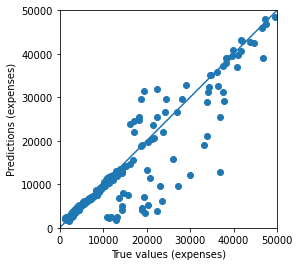

In [73]:
# -------------------------------------- Testing the model ---------------------------------------------------------------

loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Absolute Error: {:5.2f} expenses".format(max_expenses * mae))

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels * max_expenses, test_predictions * max_expenses)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
